In [11]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('dataset/Covid-19 Twitter Dataset (Aug-Sep 2020).csv')
df2 = pd.read_csv('dataset/Covid-19 Twitter Dataset (Apr-Jun 2021).csv')
df3 = pd.read_csv('dataset/Covid-19 Twitter Dataset (Apr-Jun 2020).csv')

# Combine the datasets
tweet_df = pd.concat([df1, df2, df3], ignore_index=True)
# Load the new dataset
covid_df = pd.read_csv('dataset/owid-covid-data.csv')

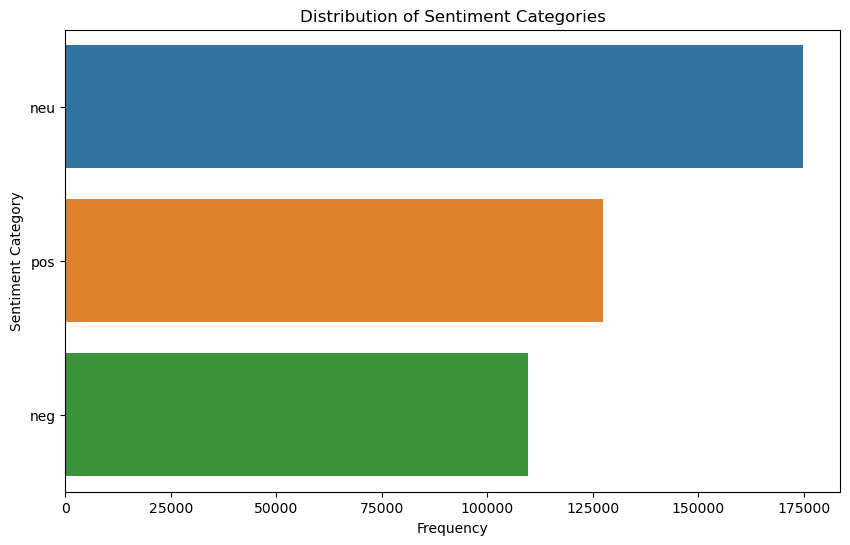

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y=tweet_df['sentiment'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Frequency')
plt.ylabel('Sentiment Category')
plt.show()


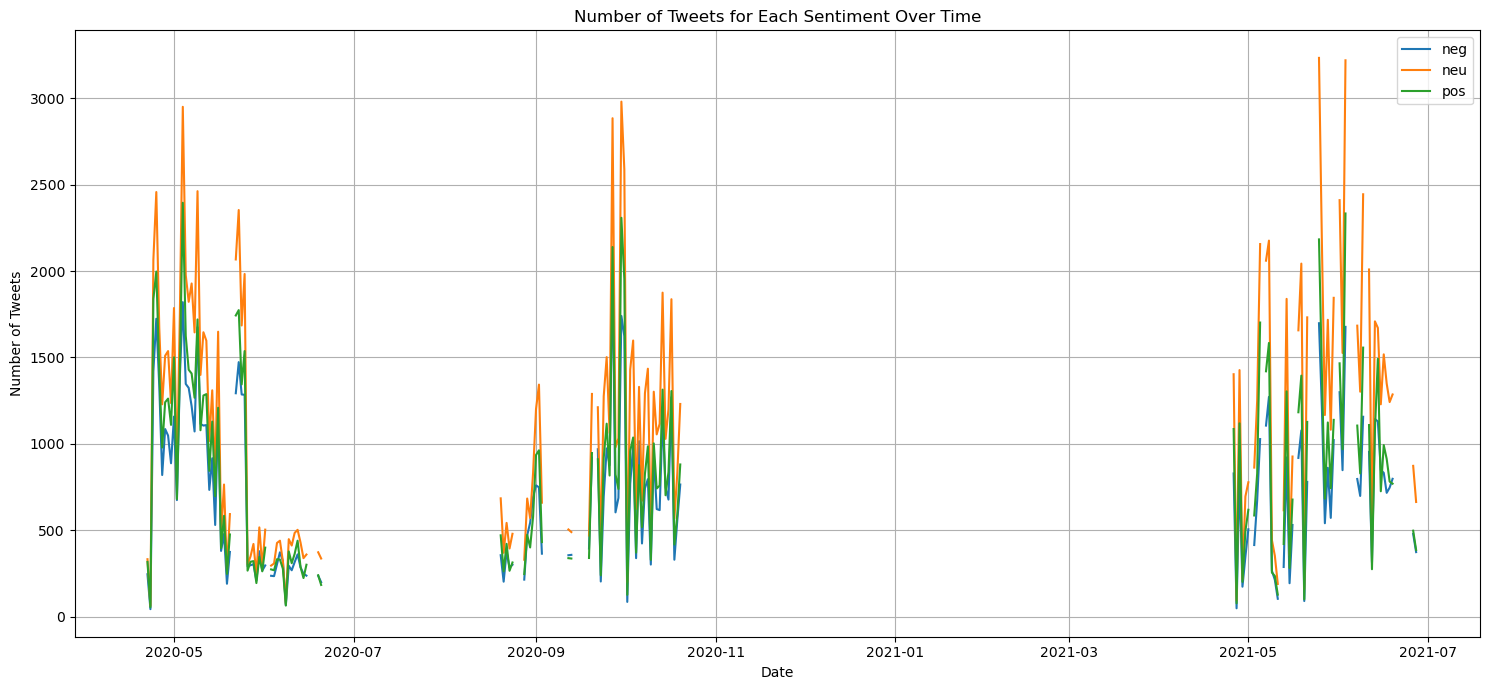

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the 'created_at' column to datetime format (if not already done)
tweet_df['created_at'] = pd.to_datetime(tweet_df['created_at'])

# Group by date and sentiment, then count the number of tweets
grouped = tweet_df.groupby([tweet_df['created_at'].dt.date, 'sentiment']).size().reset_index(name='count')

# Pivot the data to have dates as the index, sentiments as columns, and counts as values
pivot_df = grouped.pivot(index='created_at', columns='sentiment', values='count')

# Reindex the dataframe with a complete date range
complete_date_range = pd.date_range(start=pivot_df.index.min(), end=pivot_df.index.max())
pivot_df = pivot_df.reindex(complete_date_range)

# Plot the time series for each sentiment with gaps
plt.figure(figsize=(15, 7))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('Number of Tweets for Each Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


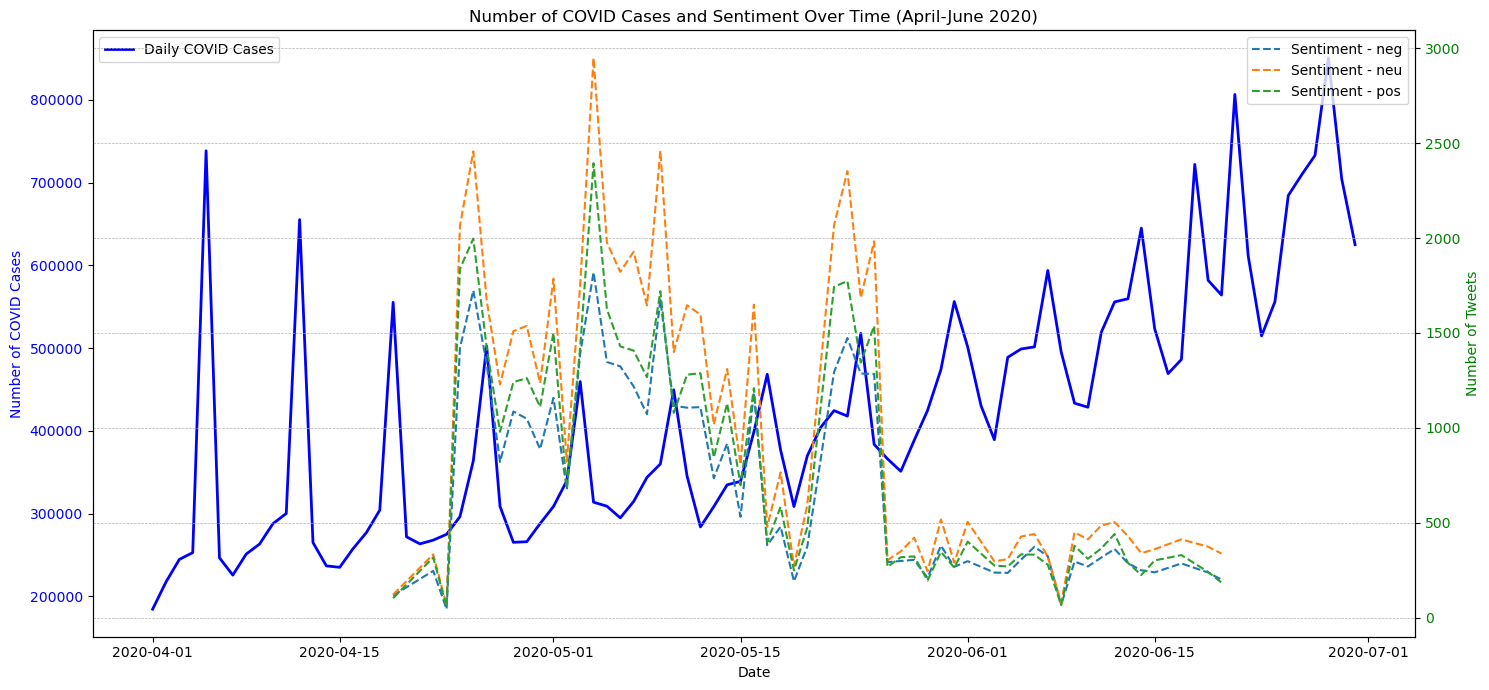

In [14]:
import matplotlib.pyplot as plt

# Convert date columns to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])
tweet_df['created_at'] = pd.to_datetime(tweet_df['created_at'])

# Filter data for the period April-June 2020
start_date = '2020-04-01'
end_date = '2020-06-30'
covid_filtered = covid_df[(covid_df['date'] >= start_date) & (covid_df['date'] <= end_date)]
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & (tweet_df['created_at'] <= end_date)]

# Aggregate data
global_daily_cases = covid_filtered.groupby('date')['new_cases'].sum()
daily_sentiments = sentiment_filtered.groupby(['created_at', 'sentiment']).size().unstack().fillna(0)

# Plot data
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting COVID cases on the primary y-axis
ax1.plot(global_daily_cases.index, global_daily_cases.values, color='b', label='Daily COVID Cases', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of COVID Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for sentiment counts
ax2 = ax1.twinx()
for column in daily_sentiments.columns:
    ax2.plot(daily_sentiments.index, daily_sentiments[column], label=f'Sentiment - {column}', linestyle='--')
ax2.set_ylabel('Number of Tweets', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Number of COVID Cases and Sentiment Over Time (April-June 2020)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [15]:
# Filter data for the period April-June 2020
start_date = '2020-04-01'
end_date = '2020-06-30'

# Filter tweet data for the period
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & (tweet_df['created_at'] <= end_date)]

# Aggregate daily sentiment scores (using the 'compound' column)
daily_sentiment_scores = sentiment_filtered.groupby('created_at')['compound'].mean()

# Aggregate number of tweets per day
daily_tweet_counts = sentiment_filtered.groupby('created_at').size()

# Filter COVID data for the period and aggregate daily new cases
global_daily_cases = covid_df[(covid_df['date'] >= start_date) & (covid_df['date'] <= end_date)]
global_daily_cases = global_daily_cases.groupby('date')['new_cases'].sum()

# Align the data
aligned_data = pd.DataFrame({
    'daily_cases': global_daily_cases,
    'daily_sentiment': daily_sentiment_scores,
    'daily_tweet_counts': daily_tweet_counts
}).dropna()  # Remove any dates with missing data

# Calculate correlations
correlation_cases_sentiment = aligned_data['daily_cases'].corr(aligned_data['daily_sentiment'])
correlation_cases_tweet_counts = aligned_data['daily_cases'].corr(aligned_data['daily_tweet_counts'])

correlation_cases_sentiment, correlation_cases_tweet_counts


(-0.5021805836881758, -0.4672046602198722)

The calculated correlations are as follows:

Correlation between daily new COVID cases and daily sentiment scores: 
−
0.502
−0.502
Correlation between daily new COVID cases and the number of tweets per day: 
−
0.467
−0.467
Both correlations are negative, which indicates an inverse relationship:

As the number of daily new COVID cases increased, the sentiment scores decreased. This suggests that as the situation worsened, the sentiment became more negative.
As the number of daily new COVID cases increased, the number of tweets per day decreased. This could suggest that as the situation became more severe, there might have been a decrease in tweeting activity. However, this is just one possible interpretation, and other factors could be at play.


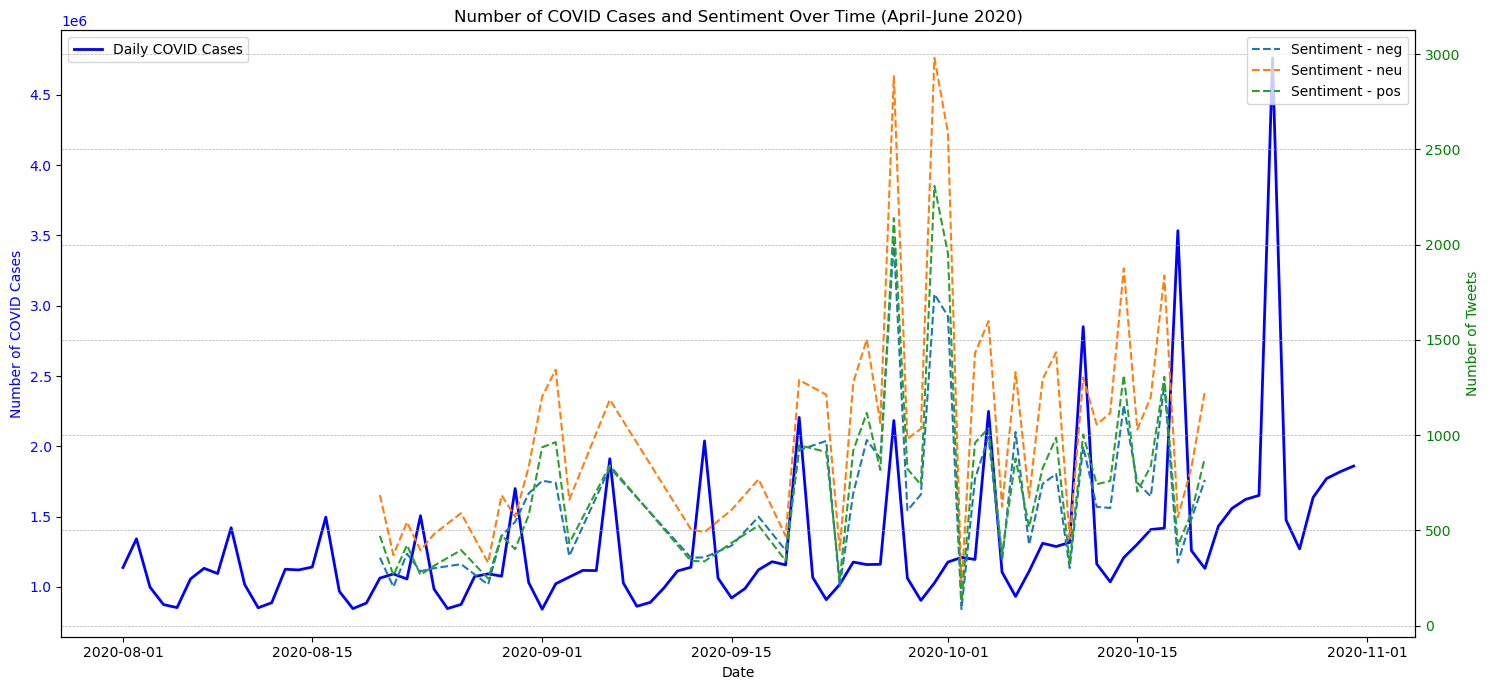

In [21]:
import matplotlib.pyplot as plt

# Convert date columns to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])
tweet_df['created_at'] = pd.to_datetime(tweet_df['created_at'])

# Define the start and end dates for the period August-October 2020
start_date = '2020-08-01'
end_date = '2020-10-31'
covid_filtered = covid_df[(covid_df['date'] >= start_date) & (covid_df['date'] <= end_date)]
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & (tweet_df['created_at'] <= end_date)]

# Aggregate data
global_daily_cases = covid_filtered.groupby('date')['new_cases'].sum()
daily_sentiments = sentiment_filtered.groupby(['created_at', 'sentiment']).size().unstack().fillna(0)

# Plot data
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting COVID cases on the primary y-axis
ax1.plot(global_daily_cases.index, global_daily_cases.values, color='b', label='Daily COVID Cases', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of COVID Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for sentiment counts
ax2 = ax1.twinx()
for column in daily_sentiments.columns:
    ax2.plot(daily_sentiments.index, daily_sentiments[column], label=f'Sentiment - {column}', linestyle='--')
ax2.set_ylabel('Number of Tweets', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Number of COVID Cases and Sentiment Over Time (April-June 2020)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [22]:
# Define the start and end dates for the period August-October 2020
start_date = '2020-08-01'
end_date = '2020-10-31'

# Filter tweet data for the period
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & (tweet_df['created_at'] <= end_date)]

# Aggregate daily sentiment scores (using the 'compound' column)
daily_sentiment_scores = sentiment_filtered.groupby('created_at')['compound'].mean()

# Aggregate number of tweets per day
daily_tweet_counts = sentiment_filtered.groupby('created_at').size()

# Filter COVID data for the period and aggregate daily new cases
global_daily_cases = covid_df[(covid_df['date'] >= start_date) & (covid_df['date'] <= end_date)]
global_daily_cases = global_daily_cases.groupby('date')['new_cases'].sum()

# Align the data
aligned_data = pd.DataFrame({
    'daily_cases': global_daily_cases,
    'daily_sentiment': daily_sentiment_scores,
    'daily_tweet_counts': daily_tweet_counts
}).dropna()  # Remove any dates with missing data

# Calculate correlations
correlation_cases_sentiment = aligned_data['daily_cases'].corr(aligned_data['daily_sentiment'])
correlation_cases_tweet_counts = aligned_data['daily_cases'].corr(aligned_data['daily_tweet_counts'])

correlation_cases_sentiment, correlation_cases_tweet_counts

(-0.0665711454772797, 0.12589509397743698)

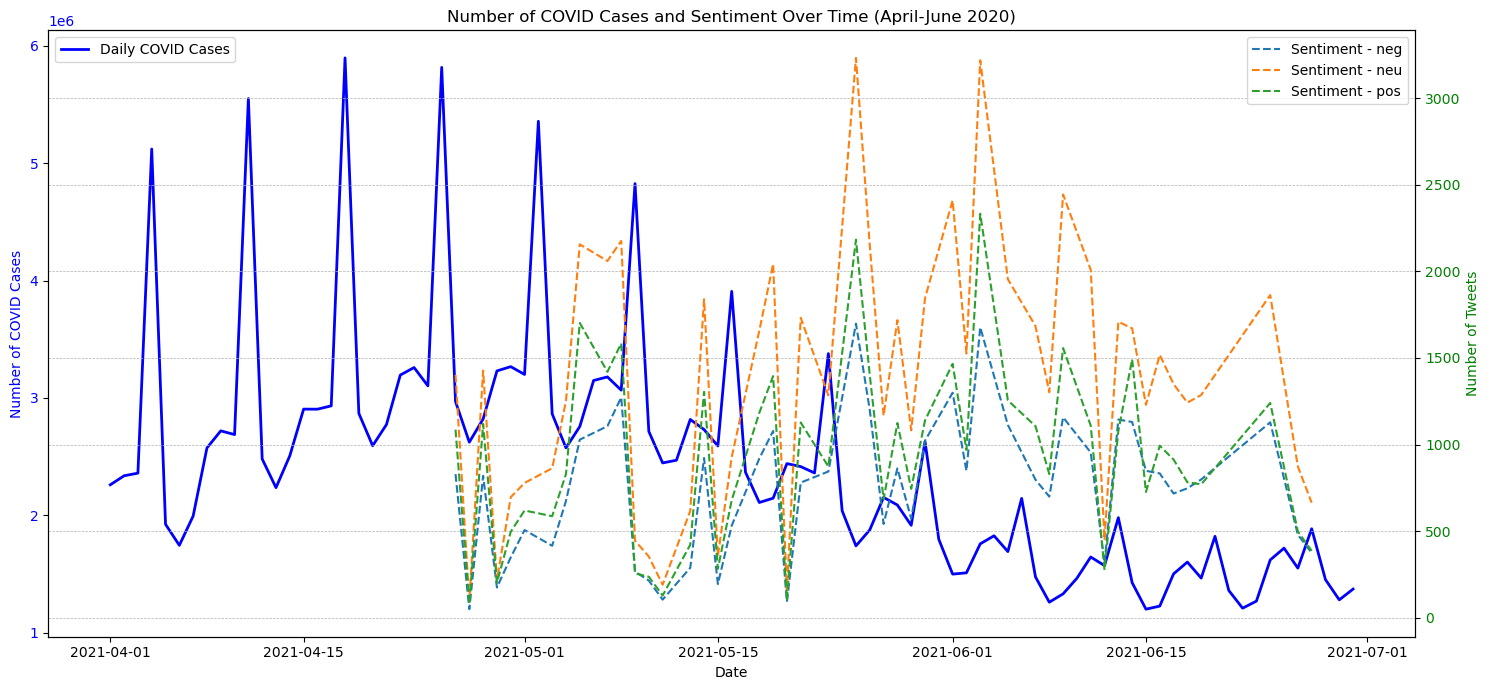

In [23]:
import matplotlib.pyplot as plt

# Convert date columns to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])
tweet_df['created_at'] = pd.to_datetime(tweet_df['created_at'])

# Define the start and end dates for the period April-June 2021
start_date = '2021-04-01'
end_date = '2021-06-30'
covid_filtered = covid_df[(covid_df['date'] >= start_date) & (covid_df['date'] <= end_date)]
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & (tweet_df['created_at'] <= end_date)]

# Aggregate data
global_daily_cases = covid_filtered.groupby('date')['new_cases'].sum()
daily_sentiments = sentiment_filtered.groupby(['created_at', 'sentiment']).size().unstack().fillna(0)

# Plot data
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting COVID cases on the primary y-axis
ax1.plot(global_daily_cases.index, global_daily_cases.values, color='b', label='Daily COVID Cases', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of COVID Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for sentiment counts
ax2 = ax1.twinx()
for column in daily_sentiments.columns:
    ax2.plot(daily_sentiments.index, daily_sentiments[column], label=f'Sentiment - {column}', linestyle='--')
ax2.set_ylabel('Number of Tweets', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Number of COVID Cases and Sentiment Over Time (April-June 2020)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [24]:
# Define the start and end dates for the period April-June 2021
start_date = '2021-04-01'
end_date = '2021-06-30'

# Filter tweet data for the period
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & (tweet_df['created_at'] <= end_date)]

# Aggregate daily sentiment scores (using the 'compound' column)
daily_sentiment_scores = sentiment_filtered.groupby('created_at')['compound'].mean()

# Aggregate number of tweets per day
daily_tweet_counts = sentiment_filtered.groupby('created_at').size()

# Filter COVID data for the period and aggregate daily new cases
global_daily_cases = covid_df[(covid_df['date'] >= start_date) & (covid_df['date'] <= end_date)]
global_daily_cases = global_daily_cases.groupby('date')['new_cases'].sum()

# Align the data
aligned_data = pd.DataFrame({
    'daily_cases': global_daily_cases,
    'daily_sentiment': daily_sentiment_scores,
    'daily_tweet_counts': daily_tweet_counts
}).dropna()  # Remove any dates with missing data

# Calculate correlations
correlation_cases_sentiment = aligned_data['daily_cases'].corr(aligned_data['daily_sentiment'])
correlation_cases_tweet_counts = aligned_data['daily_cases'].corr(aligned_data['daily_tweet_counts'])

correlation_cases_sentiment, correlation_cases_tweet_counts

(0.1542534447911839, -0.3503603649083116)

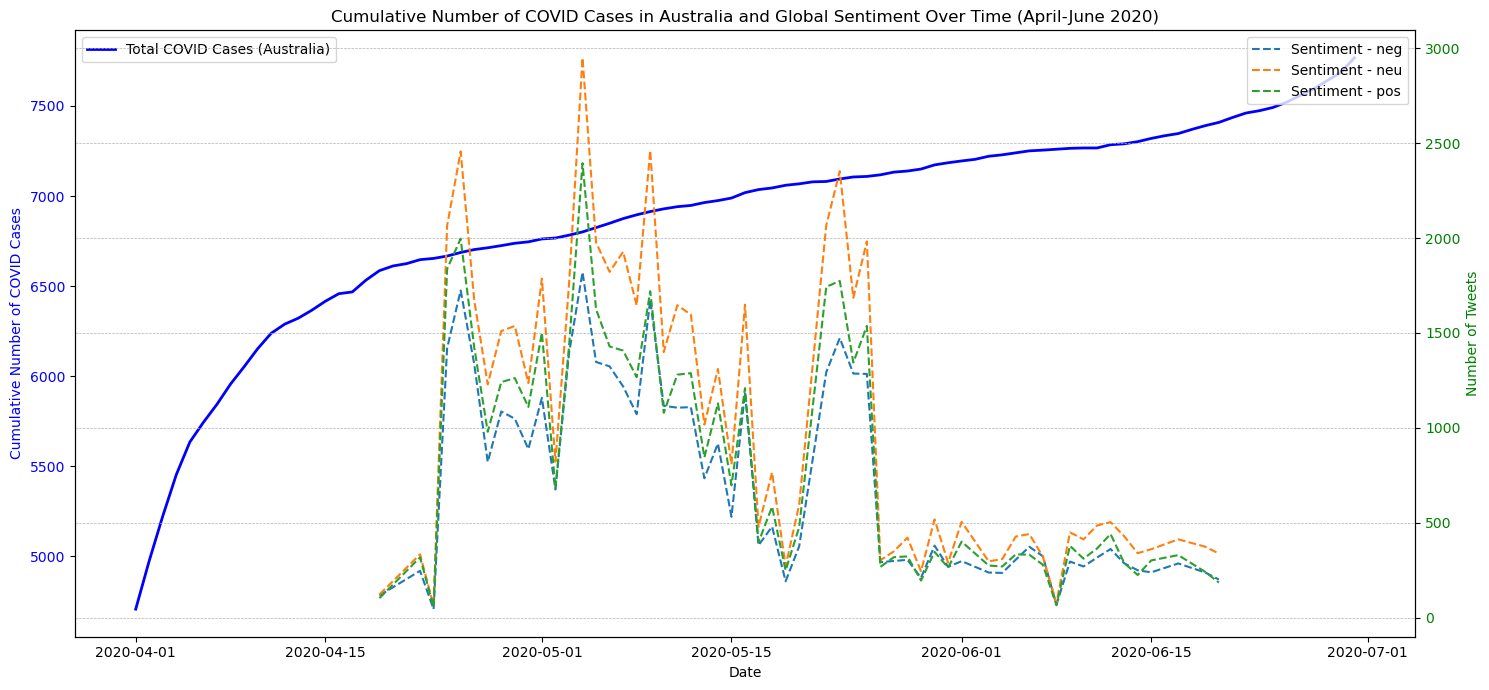

In [26]:
import matplotlib.pyplot as plt

# Convert date columns to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])
tweet_df['created_at'] = pd.to_datetime(tweet_df['created_at'])

# Filter data for the period April-June 2020 and for Australia
start_date = '2020-04-01'
end_date = '2020-06-30'
covid_australia = covid_df[(covid_df['location'] == 'Australia') & 
                           (covid_df['date'] >= start_date) & 
                           (covid_df['date'] <= end_date)]
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & 
                              (tweet_df['created_at'] <= end_date)]

# Aggregate data using total_cases for Australia
australia_total_cases = covid_australia.groupby('date')['total_cases'].sum()
daily_sentiments = sentiment_filtered.groupby(['created_at', 'sentiment']).size().unstack().fillna(0)

# Plot data
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting COVID total cases for Australia on the primary y-axis
ax1.plot(australia_total_cases.index, australia_total_cases.values, color='b', label='Total COVID Cases (Australia)', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Number of COVID Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for sentiment counts
ax2 = ax1.twinx()
for column in daily_sentiments.columns:
    ax2.plot(daily_sentiments.index, daily_sentiments[column], label=f'Sentiment - {column}', linestyle='--')
ax2.set_ylabel('Number of Tweets', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Cumulative Number of COVID Cases in Australia and Global Sentiment Over Time (April-June 2020)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


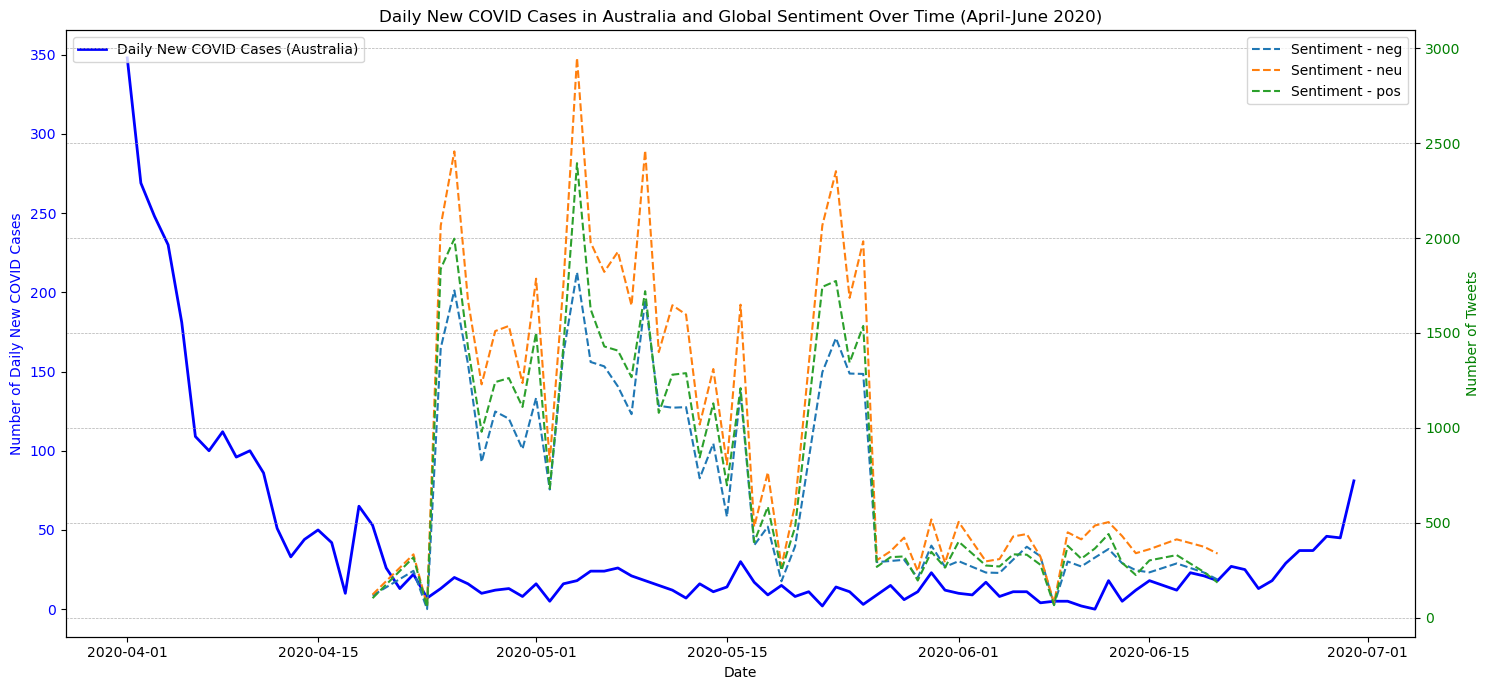

In [33]:
import matplotlib.pyplot as plt

start_date = '2020-04-01'
end_date = '2020-06-30'
# Filter data for the period April-June 2020 and for Australia
covid_australia = covid_df[(covid_df['location'] == 'Australia') & 
                           (covid_df['date'] >= start_date) & 
                           (covid_df['date'] <= end_date)]
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & 
                              (tweet_df['created_at'] <= end_date)]

# Aggregate data using new_cases for Australia

australia_new_cases = covid_australia.groupby('date')['new_cases'].sum()
daily_sentiments = sentiment_filtered.groupby(['created_at', 'sentiment']).size().unstack().fillna(0)

# Plot data
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting daily new COVID cases for Australia on the primary y-axis
ax1.plot(australia_new_cases.index, australia_new_cases.values, color='b', label='Daily New COVID Cases (Australia)', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Daily New COVID Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for sentiment counts
ax2 = ax1.twinx()
for column in daily_sentiments.columns:
    ax2.plot(daily_sentiments.index, daily_sentiments[column], label=f'Sentiment - {column}', linestyle='--')
ax2.set_ylabel('Number of Tweets', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Daily New COVID Cases in Australia and Global Sentiment Over Time (April-June 2020)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


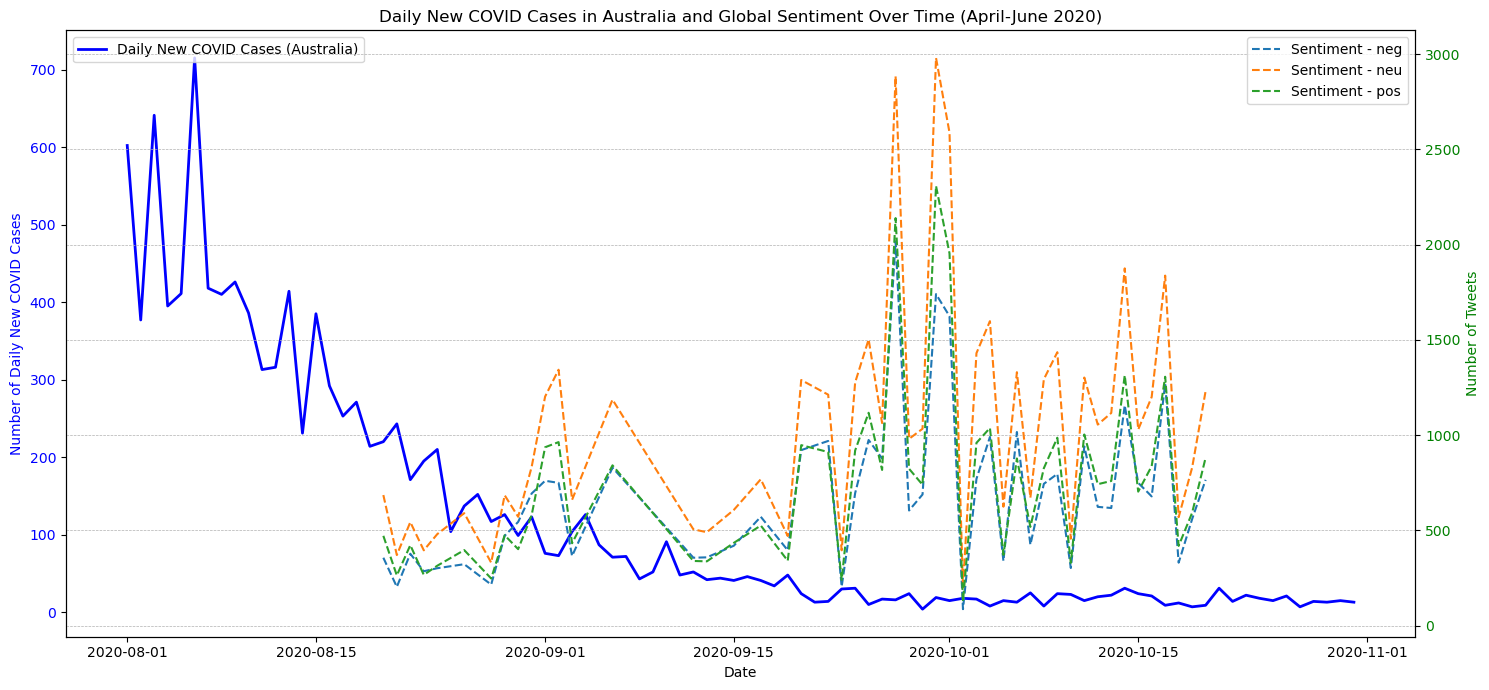

In [34]:
import matplotlib.pyplot as plt

start_date = '2020-08-01'
end_date = '2020-10-31'
# Filter data for the period April-June 2020 and for Australia
covid_australia = covid_df[(covid_df['location'] == 'Australia') & 
                           (covid_df['date'] >= start_date) & 
                           (covid_df['date'] <= end_date)]
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & 
                              (tweet_df['created_at'] <= end_date)]

# Aggregate data using new_cases for Australia

australia_new_cases = covid_australia.groupby('date')['new_cases'].sum()
daily_sentiments = sentiment_filtered.groupby(['created_at', 'sentiment']).size().unstack().fillna(0)

# Plot data
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting daily new COVID cases for Australia on the primary y-axis
ax1.plot(australia_new_cases.index, australia_new_cases.values, color='b', label='Daily New COVID Cases (Australia)', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Daily New COVID Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for sentiment counts
ax2 = ax1.twinx()
for column in daily_sentiments.columns:
    ax2.plot(daily_sentiments.index, daily_sentiments[column], label=f'Sentiment - {column}', linestyle='--')
ax2.set_ylabel('Number of Tweets', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Daily New COVID Cases in Australia and Global Sentiment Over Time (April-June 2020)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


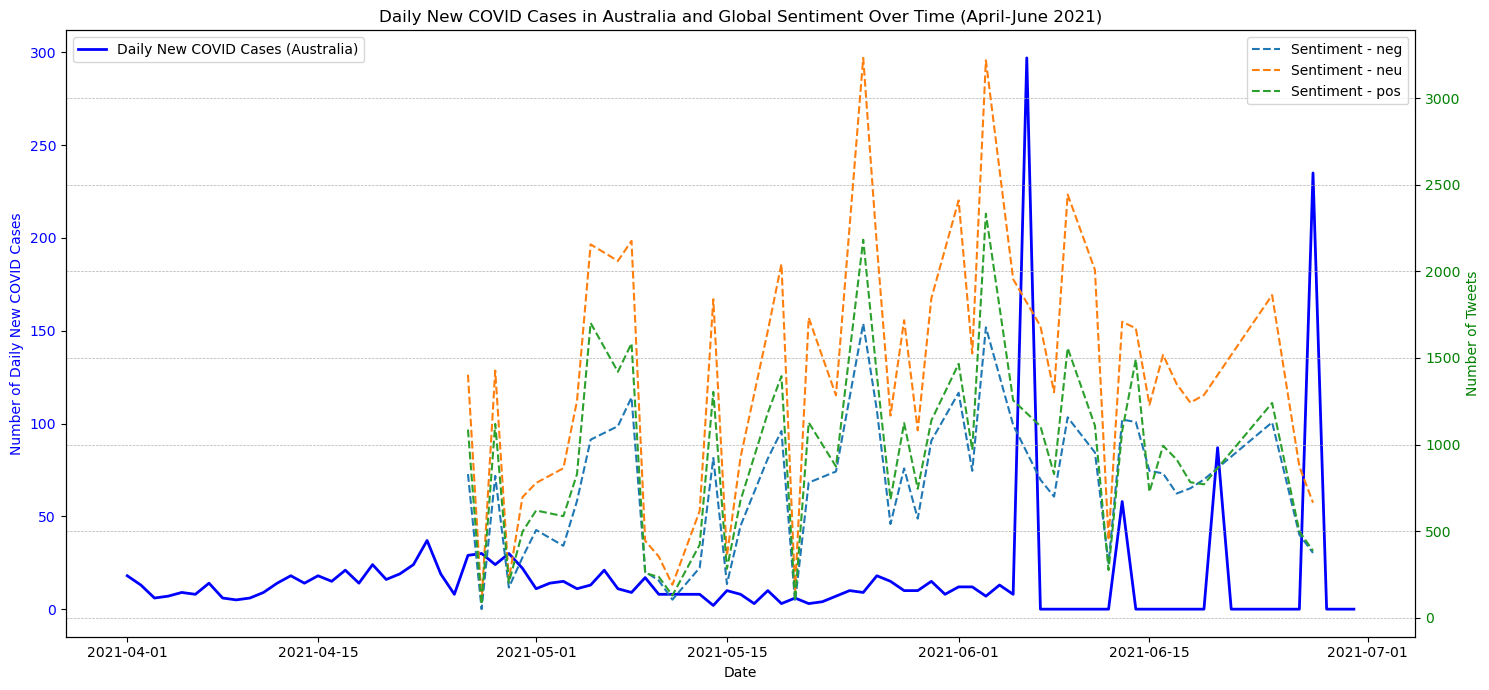

In [31]:
import matplotlib.pyplot as plt
start_date = '2021-04-01'
end_date = '2021-06-30'
# Filter data for the period April-June 2020 and for Australia
covid_australia = covid_df[(covid_df['location'] == 'Australia') & 
                           (covid_df['date'] >= start_date) & 
                           (covid_df['date'] <= end_date)]
sentiment_filtered = tweet_df[(tweet_df['created_at'] >= start_date) & 
                              (tweet_df['created_at'] <= end_date)]

# Aggregate data using new_cases for Australia

australia_new_cases = covid_australia.groupby('date')['new_cases'].sum()
daily_sentiments = sentiment_filtered.groupby(['created_at', 'sentiment']).size().unstack().fillna(0)

# Plot data
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting daily new COVID cases for Australia on the primary y-axis
ax1.plot(australia_new_cases.index, australia_new_cases.values, color='b', label='Daily New COVID Cases (Australia)', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Daily New COVID Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for sentiment counts
ax2 = ax1.twinx()
for column in daily_sentiments.columns:
    ax2.plot(daily_sentiments.index, daily_sentiments[column], label=f'Sentiment - {column}', linestyle='--')
ax2.set_ylabel('Number of Tweets', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Daily New COVID Cases in Australia and Global Sentiment Over Time (April-June 2021)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


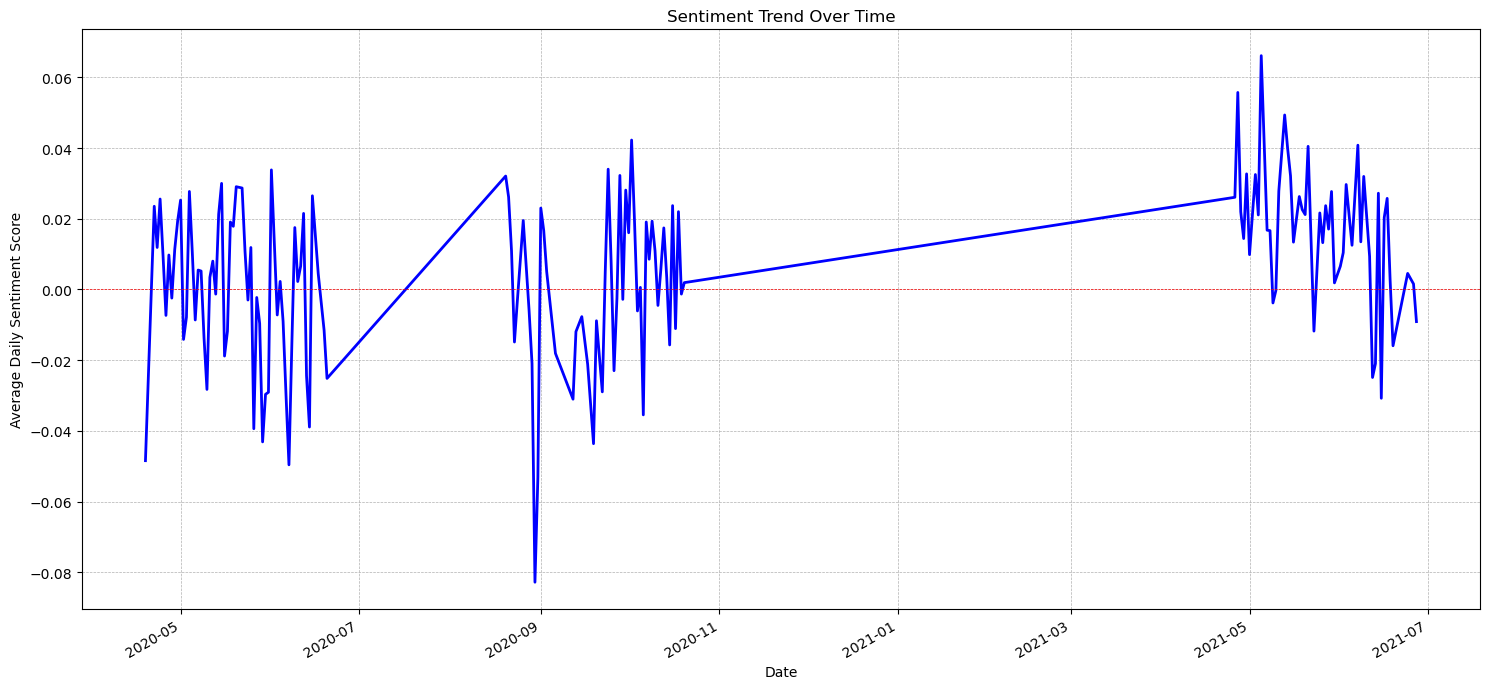

In [35]:
# Sentiment Trend Over Time

# Aggregate daily sentiment scores using the 'compound' column
daily_sentiment_scores = tweet_df.groupby('created_at')['compound'].mean()

plt.figure(figsize=(15, 7))
daily_sentiment_scores.plot(linewidth=2, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=0.5)  # Adding a line at y=0 for reference
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Sentiment Score')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import matplotlib.pyplot as plt

# Preprocessing function
def preprocess_tweets_alternative(text):
    tokens = text.split()
    tokens = [token for token in tokens if token.isalpha()]
    return ' '.join(tokens)

# Preprocess the full 'original_text' column
full_tweets_original = tweet_df['original_text'].dropna().apply(preprocess_tweets_alternative)

# Convert the processed tweets into a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
X_full = vectorizer.fit_transform(full_tweets_original)

# Perform LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X_full)

# Display topics function
def display_topics(model, feature_names, no_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

topics_full = display_topics(lda, vectorizer.get_feature_names_out())
print(topics_full)



{0: ['rt', 'vaccine', 'data', 'face', 'mask', 'family', 'pandemic', 'lost', 'masks', 'years'], 1: ['rt', 'trump', 'world', 'president', 'response', 'said', 'great', 'uk', 'covid', 'think'], 2: ['rt', 'vaccination', 'fight', 'free', 'students', 'crisis', 'government', 'know', 'covid', 'support'], 3: ['rt', 'people', 'need', 'like', 'help', 'covid', 'workers', 'care', 'hospital', 'know'], 4: ['rt', 'health', 'public', 'say', 'home', 'impact', 'make', 'stay', 'officials', 'pm'], 5: ['rt', 'just', 'news', 'good', 'days', 'study', 'house', 'use', 'research', 'life'], 6: ['rt', 'positive', 'tested', 'test', 'patients', 'million', 'people', 'tests', 'testing', 'want'], 7: ['rt', 'lockdown', 'going', 'social', 'global', 'vaccinated', 'restrictions', 'second', 'way', 'wave'], 8: ['new', 'rt', 'cases', 'covid', 'deaths', 'reported', 'virus', 'state', 'read', 'confirmed'], 9: ['rt', 'time', 'cases', 'death', 'new', 'coronavirus', 'india', 'spread', 'number', 'daily']}


Topic 0: Vaccination & Precautionary Measures - Discussions about vaccines, data regarding vaccination, the importance of face masks, and the impact of the pandemic on families.

Topic 1: Political Leadership & Response - Discussions centered around political figures, notably Trump, the global response to the pandemic, the UK's stance, and opinions on leadership.

Topic 2: Government Support & Vaccination Efforts - Emphasis on vaccination drives, governmental support, crisis management, and rallying support.

Topic 3: Healthcare Workers & Patient Care - Focus on the challenges and needs of healthcare workers, patient care, and the hospital environment during the pandemic.

Topic 4: Public Health Guidelines - Conversations about public health recommendations, staying at home, and directives from health officials.

Topic 5: Pandemic News & Research - Sharing of news updates, research findings, and the general impact of the pandemic on daily life.

Topic 6: Testing & Diagnosis - Discussions about testing for COVID-19, the number of positive cases, and the importance of timely diagnosis.

Topic 7: Lockdowns & Restrictions - Conversations around lockdowns, social distancing measures, vaccination progress, and the potential for a second wave.

Topic 8: Statistics & Updates - Sharing of new COVID-19 cases, death statistics, and state-level data.

Topic 9: Global Impact & Statistics - Discussion about the global spread, focusing on countries like India, the overall number of cases, and daily updates.



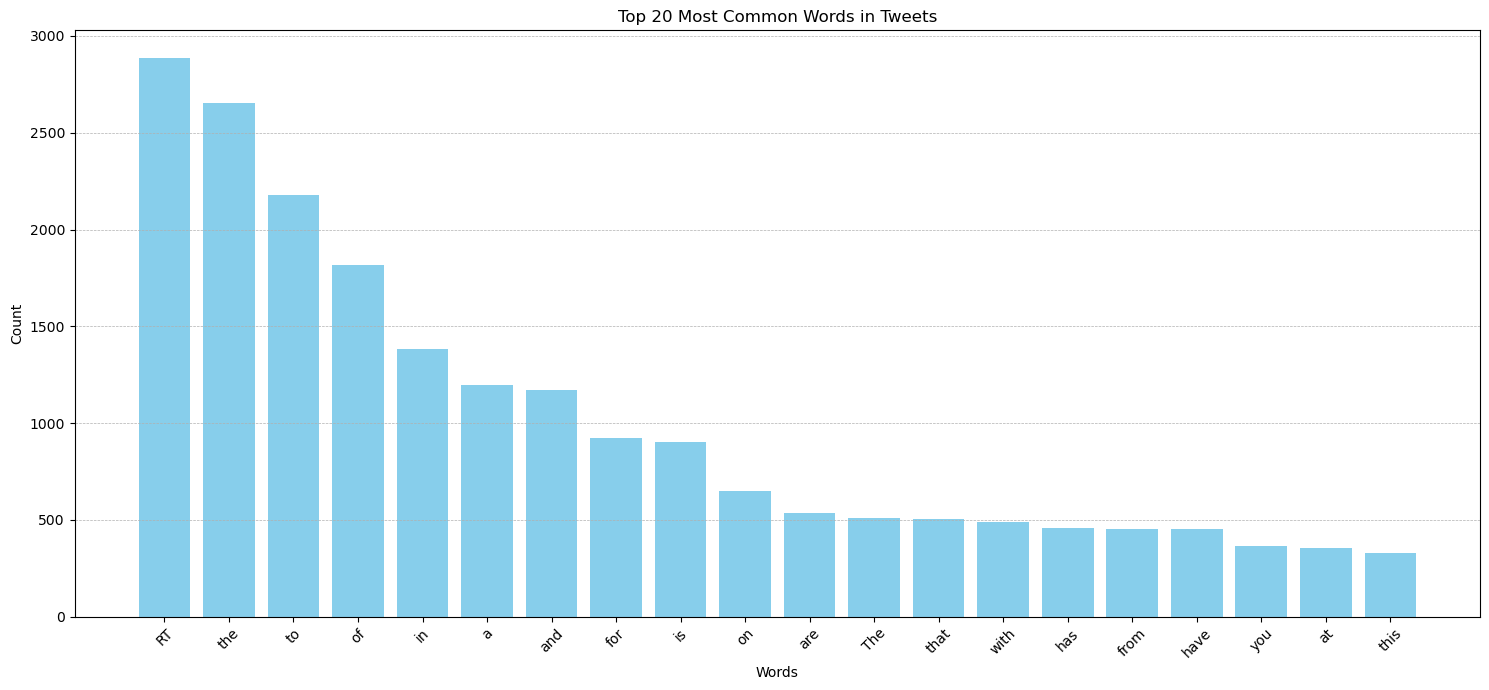

[('RT', 2885),
 ('the', 2656),
 ('to', 2176),
 ('of', 1819),
 ('in', 1385),
 ('a', 1198),
 ('and', 1171),
 ('for', 923),
 ('is', 903),
 ('on', 648),
 ('are', 538),
 ('The', 511),
 ('that', 503),
 ('with', 487),
 ('has', 460),
 ('from', 454),
 ('have', 452),
 ('you', 363),
 ('at', 357),
 ('this', 330)]

In [40]:
from collections import Counter

# Tokenize and preprocess the tweets
all_words = ' '.join(sample_tweets_original).split()

# Count the occurrences of each word
word_count = Counter(all_words)

# Display the 20 most common words
common_words = word_count.most_common(20)

# Plotting the most common words
plt.figure(figsize=(15, 7))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 20 Most Common Words in Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

common_words
